In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import os

In [2]:
df_sissi = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/PETfold/PETfold_Excel/sissi.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/PETfold/PETfold_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/PETfold/PETfold_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/PETfold/PETfold_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/PETfold/PETfold_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/PETfold/PETfold_Excel/alifoldz.xlsx"))

save_path = "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/PETfold/"

In [3]:
df_sissi.head(10)

,Score,File
0,0.652097,pos_sample_output_40967.txt
1,0.649949,pos_sample_output_46231.txt
2,0.627383,pos_sample_output_48206.txt
3,0.642756,pos_sample_output_62307.txt
4,0.664561,pos_sample_output_92045.txt
5,0.659309,pos_sample_output_81673.txt
6,0.650139,pos_sample_output_1898.txt
7,0.667197,pos_sample_output_8237.txt
8,0.639937,pos_sample_output_33854.txt
9,0.609806,pos_sample_output_93864.txt


In [4]:
df_sissi[['Score']].describe()

,Score
count,100000.000000
mean,0.648821
std,0.017879
min,0.545575
25%,0.638098
50%,0.650105
75%,0.660545
max,0.937201


In [5]:
df_sissiz_mono.head(10)

,Score,File
0,0.313538,neg_sample_SISSIz_mono_output_73365.txt
1,0.297482,neg_sample_SISSIz_mono_output_10484.txt
2,0.295696,neg_sample_SISSIz_mono_output_42941.txt
3,0.282663,neg_sample_SISSIz_mono_output_39096.txt
4,0.274145,neg_sample_SISSIz_mono_output_92212.txt
5,0.268570,neg_sample_SISSIz_mono_output_45756.txt
6,0.304982,neg_sample_SISSIz_mono_output_90090.txt
7,0.324773,neg_sample_SISSIz_mono_output_28499.txt
8,0.279710,neg_sample_SISSIz_mono_output_66146.txt
9,0.283797,neg_sample_SISSIz_mono_output_55873.txt


In [6]:
df_sissiz_mono[['Score']].describe()

,Score
count,100000.000000
mean,0.298374
std,0.025835
min,0.238784
25%,0.278760
50%,0.295066
75%,0.314489
max,0.421184


In [7]:
df_sissiz_di.head(10)

,Score,File
0,0.336244,neg_sample_SISSIz_di_output_70835.txt
1,0.331909,neg_sample_SISSIz_di_output_4927.txt
2,0.286139,neg_sample_SISSIz_di_output_94808.txt
3,0.315563,neg_sample_SISSIz_di_output_63826.txt
4,0.315221,neg_sample_SISSIz_di_output_30058.txt
5,0.301729,neg_sample_SISSIz_di_output_71565.txt
6,0.311489,neg_sample_SISSIz_di_output_5524.txt
7,0.284362,neg_sample_SISSIz_di_output_40908.txt
8,0.263768,neg_sample_SISSIz_di_output_83551.txt
9,0.336866,neg_sample_SISSIz_di_output_29386.txt


In [8]:
df_sissiz_di[['Score']].describe()

,Score
count,100000.000000
mean,0.300528
std,0.026489
min,0.242512
25%,0.280632
50%,0.297360
75%,0.316656
max,0.422445


In [9]:
df_multiperm_mono.head(10)

,Score,File
0,0.342839,neg_sample_MULTIPERM_mono_output_53564.txt
1,0.268787,neg_sample_MULTIPERM_mono_output_89828.txt
2,0.283279,neg_sample_MULTIPERM_mono_output_89767.txt
3,0.282488,neg_sample_MULTIPERM_mono_output_18799.txt
4,0.287803,neg_sample_MULTIPERM_mono_output_8453.txt
5,0.277595,neg_sample_MULTIPERM_mono_output_25972.txt
6,0.291874,neg_sample_MULTIPERM_mono_output_6836.txt
7,0.263157,neg_sample_MULTIPERM_mono_output_1026.txt
8,0.294152,neg_sample_MULTIPERM_mono_output_92469.txt
9,0.295682,neg_sample_MULTIPERM_mono_output_68773.txt


In [10]:
df_multiperm_mono[['Score']].describe()

,Score
count,100000.000000
mean,0.301642
std,0.026626
min,0.240195
25%,0.281526
50%,0.298625
75%,0.318433
max,0.432986


In [11]:
df_multiperm_di.head(10)

,Score,File
0,0.268847,neg_sample_MULTIPERM_di_output_94614.txt
1,0.292982,neg_sample_MULTIPERM_di_output_92804.txt
2,0.275238,neg_sample_MULTIPERM_di_output_9652.txt
3,0.335546,neg_sample_MULTIPERM_di_output_35050.txt
4,0.308554,neg_sample_MULTIPERM_di_output_45501.txt
5,0.326410,neg_sample_MULTIPERM_di_output_28134.txt
6,0.289439,neg_sample_MULTIPERM_di_output_73292.txt
7,0.375366,neg_sample_MULTIPERM_di_output_82382.txt
8,0.278370,neg_sample_MULTIPERM_di_output_93539.txt
9,0.336302,neg_sample_MULTIPERM_di_output_38891.txt


In [12]:
df_multiperm_di[['Score']].describe()

,Score
count,100000.000000
mean,0.302178
std,0.026355
min,0.238962
25%,0.282445
50%,0.299125
75%,0.318753
max,0.447982


In [13]:
df_aln_shuffle.head(10)

,Score,File
0,0.460735,neg_sample_ALIFOLDz_output_51391.txt
1,0.500653,neg_sample_ALIFOLDz_output_26875.txt
2,0.528038,neg_sample_ALIFOLDz_output_69011.txt
3,0.506563,neg_sample_ALIFOLDz_output_60391.txt
4,0.552820,neg_sample_ALIFOLDz_output_84402.txt
5,0.528381,neg_sample_ALIFOLDz_output_18166.txt
6,0.548445,neg_sample_ALIFOLDz_output_36513.txt
7,0.559847,neg_sample_ALIFOLDz_output_5860.txt
8,0.532762,neg_sample_ALIFOLDz_output_34230.txt
9,0.540032,neg_sample_ALIFOLDz_output_39510.txt


In [14]:
df_aln_shuffle[['Score']].describe()

,Score
count,100000.000000
mean,0.528660
std,0.024158
min,0.402533
25%,0.513872
50%,0.530423
75%,0.545338
max,0.609553


## Score

/tmp/ipykernel_15079/1663463055.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_15079/1663463055.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_15079/1663463055.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_15079/1663463055.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


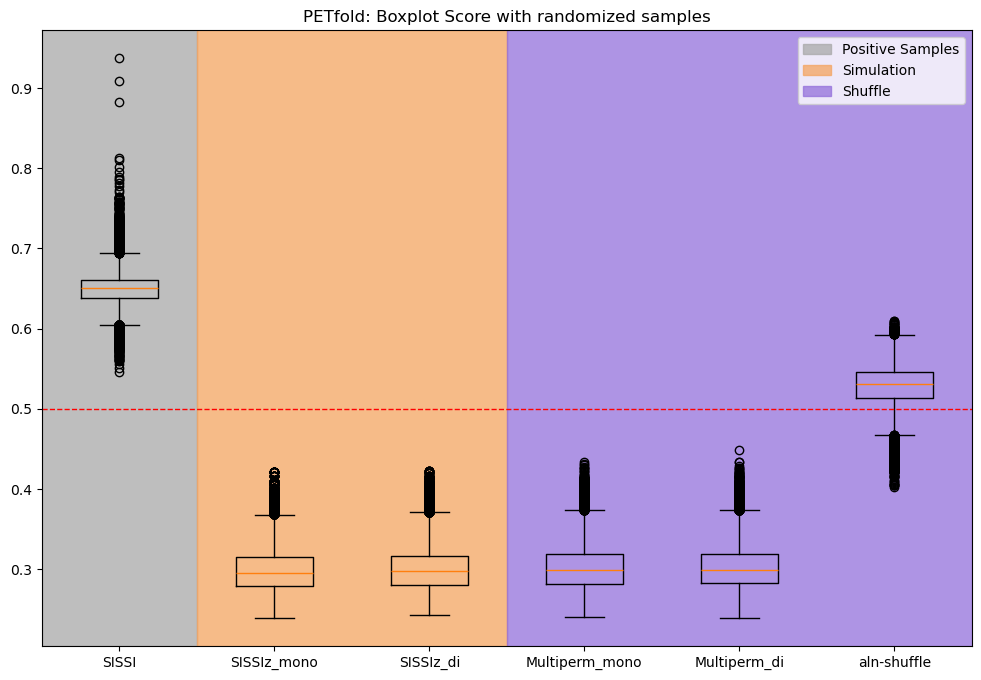

In [15]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Score'] for df in dataframes]
thresholds = [0.5]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

# Bereiche farbig markieren
plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

# Speichern optional
if save_path:
    filename = os.path.join(save_path, "PETfold: Boxplot Score with randomized samples.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')

# plt.ylim(0.9825, 1.0)
plt.title('PETfold: Boxplot Score with randomized samples')
plt.legend()
plt.show()